In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import cohen_kappa_score


In [3]:
from ucimlrepo import fetch_ucirepo
parkinsons_telemonitoring = fetch_ucirepo(id=189)
df = parkinsons_telemonitoring.data.features
y = parkinsons_telemonitoring.data.targets
df["Target"] = y["total_UPDRS"]
df.isnull().sum()
corr = df.corr()
corr["Target"].sort_values()

X = df.drop(columns=["Target", "sex", "NHR"])
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_15048\4227529144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Target"] = y["total_UPDRS"]


In [4]:
# Definir los modelos
ridge = Ridge(alpha=10)
random_forest = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2)

# Entrenar los modelos
ridge.fit(X_train, y_train)
random_forest.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200)

In [5]:
# Predecir con ambos modelos
y_pred_ridge = ridge.predict(X_test)
y_pred_rf = random_forest.predict(X_test)


In [6]:
# Calcular métricas de desempeño
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Mostrar resultados
print(f"Ridge - MSE: {mse_ridge}, R2: {r2_ridge}, MAE: {mae_ridge}")
print(f"RandomForest - MSE: {mse_rf}, R2: {r2_rf}, MAE: {mae_rf}")


Ridge - MSE: 96.140967129587, R2: 0.13240387369242956, MAE: 8.222269249356144
RandomForest - MSE: 5.322399264672513, R2: 0.9519695596730579, MAE: 1.1216826528476205


In [7]:
# Análisis de concordancia
# Redondeamos las predicciones para análisis de concordancia
y_pred_ridge_rounded = np.round(y_pred_ridge)
y_pred_rf_rounded = np.round(y_pred_rf)

# Calculamos el coeficiente kappa de Cohen
kappa_score = cohen_kappa_score(y_pred_ridge_rounded, y_pred_rf_rounded)
print(f"Cohen's Kappa Score: {kappa_score}")


Cohen's Kappa Score: -0.0038845952742949663


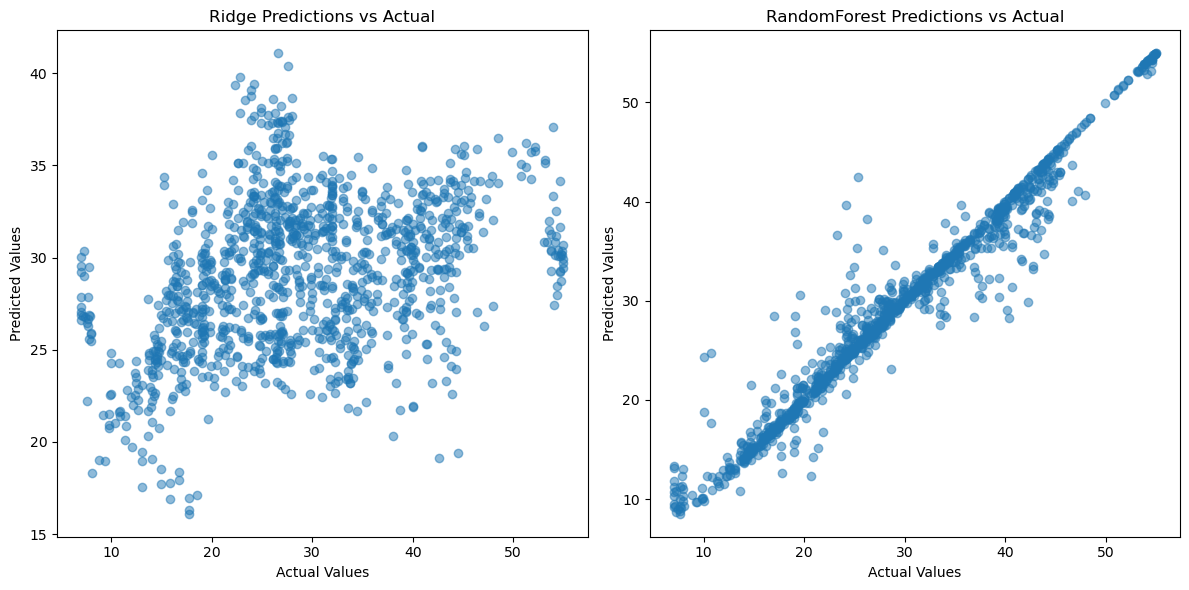

In [12]:
# Gráficos de comparación
plt.figure(figsize=(12, 6))

# Gráfico de predicciones vs valores reales para Ridge
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.title("Ridge Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Gráfico de predicciones vs valores reales para RandomForest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title("RandomForest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()